In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from matplotlib.patches import Polygon

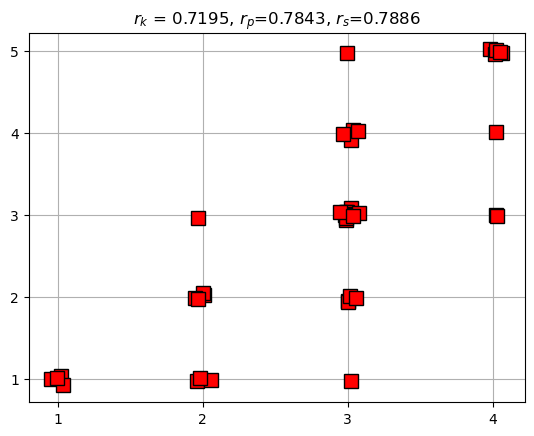

In [7]:
N = 40

docuRatings = np.random.randint(low=1,high=6,size=N)

eduLevel = np.ceil((docuRatings + np.random.randint(low=1,high=5,size=N))/9*4)

cr = [0,0,0]
cr[0] = stats.kendalltau(eduLevel,docuRatings)[0]
cr[1] = stats.pearsonr(eduLevel,docuRatings)[0]
cr[2] = stats.spearmanr(eduLevel,docuRatings)[0]

cr = np.round(cr,4)

plt.plot(eduLevel+np.random.randn(N)/30,docuRatings+np.random.randn(N)/30,'ks',markersize=10,markerfacecolor='red')
plt.xticks(np.arange(4)+1)
plt.yticks(np.arange(5)+1)
plt.grid()
plt.title('$r_k$ = %g, $r_p$=%g, $r_s$=%g'%(cr[0],cr[1],cr[2]) )

plt.show()


In [9]:
numExprs = 1000
nValues = 50
nCategories = 6

c = np.zeros((numExprs,3))

for i in range(numExprs):
    
    x = np.random.randint(low=0,high=nCategories,size=nValues)
    y = np.random.randint(low=0,high=nCategories,size=nValues)
    
    c[i,:] = [stats.kendalltau(x,y)[0],
              stats.pearsonr(x,y)[0],
              stats.spearmanr(x,y)[0]
             ]

print(c)

[[ 0.01361884  0.02287627  0.0191167 ]
 [-0.05552998 -0.07317073 -0.06715898]
 [ 0.05659064  0.06438374  0.07184505]
 ...
 [-0.20078701 -0.27928012 -0.27065215]
 [-0.1473789  -0.22368067 -0.18943525]
 [-0.07580189 -0.10232225 -0.10064535]]


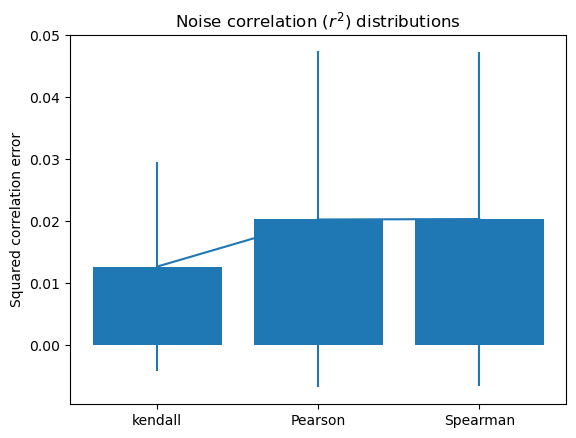

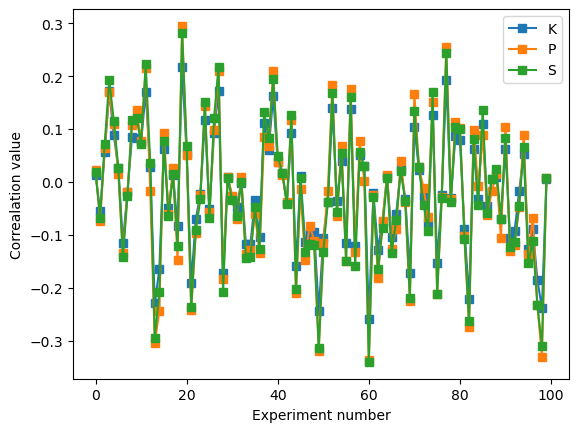

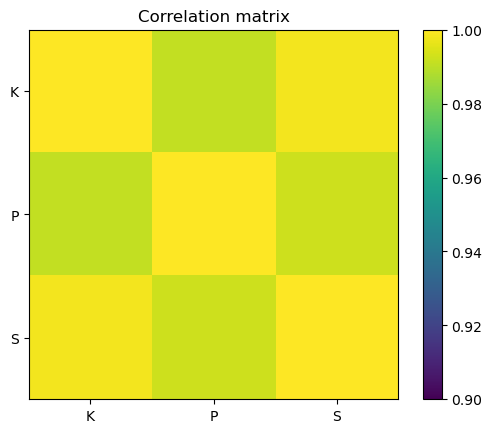

In [11]:
plt.bar(range(3),np.mean(c**2,axis=0))
plt.errorbar(range(3),np.mean(c**2,axis=0),yerr=np.std(c**2,ddof=1,axis=0))
plt.xticks(range(3),('kendall','Pearson', 'Spearman'))
plt.ylabel('Squared correlation error')
plt.title('Noise correlation ($r^2$) distributions')
plt.show()

plt.plot(c[:100,:],'s-')
plt.xlabel('Experiment number')
plt.ylabel('Correalation value')
plt.legend(('K', 'P', 'S'))
plt.show()

plt.imshow(np.corrcoef(c.T),vmin=.9,vmax=1)
plt.xticks(range(3),['K', 'P', 'S'])
plt.yticks(range(3),('K', 'P', 'S'))
plt.colorbar()
plt.title('Correlation matrix')
plt.show()